In [ ]:
# Adam Haizriq - EDA Assignment

In [ ]:
# Step 1 - Import Neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings .filterwarnings('ignore')

In [ ]:
# Step 2 - Reading the Dataset

In [4]:
data = pd.read_csv('used_cars_data.csv')
data.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [8]:
data.shape

(7253, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [10]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [11]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [12]:
# Shows the percentages of missing value in each column.
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [13]:
# Step 3 - Data Reduction
# *Remove Columns that have no impact to the prediction outcome

In [15]:
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
# Step 4 - Feature Engineering
# Turning RAW data into more meaningful and understandable data.

In [19]:
from datetime import date
date.today().year
data['Car_Age'] = date.today().year - data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,11
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,15
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,14
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,13


In [ ]:
# Creating new feature by splitting existing features

In [20]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta
2,Honda Jazz V,Honda,Jazz
3,Maruti Ertiga VDI,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento
7249,Volkswagen Polo GT TSI,Volkswagen,Polo
7250,Nissan Micra Diesel XV,Nissan,Micra
7251,Volkswagen Polo GT TSI,Volkswagen,Polo


In [ ]:
#Step 5 - Data Cleaning/Wrangler

In [21]:
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [22]:
Xbrand = ['Isuzu','ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(Xbrand))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,12,Land,Rover
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,14,Land,Rover
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,9,Mini,Countryman
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,8,Land,Rover
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,9,Mini,Cooper


In [28]:
data['Brand'].replace({'ISUZU':'Isuzu','Mini':'Mini Cooper','Land':'Land Rover'},inplace=True)
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [ ]:
# Now the dataset is ready for EDA.
# Step 6 - EDA Exploratoty Data Analysis 

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,12.634634,3.254421,7.00,10.0,12.00,15.00,30.0


In [32]:
# Seperating numerical and categorical data
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


In [ ]:
# Univariate Analysis
#Univariate analysis can be done for both Categorical and Numerical variables.
#Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.
#Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Year
Skew : -0.84


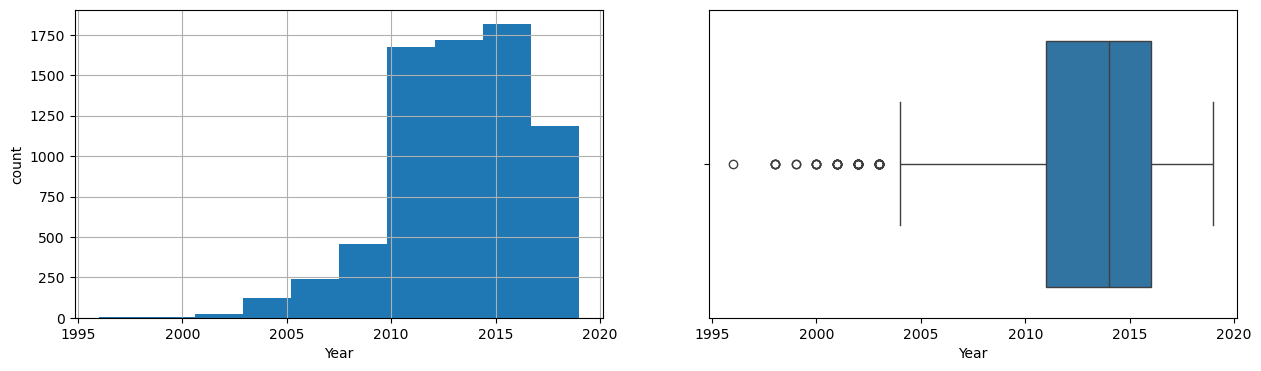

Kilometers_Driven
Skew : 61.58


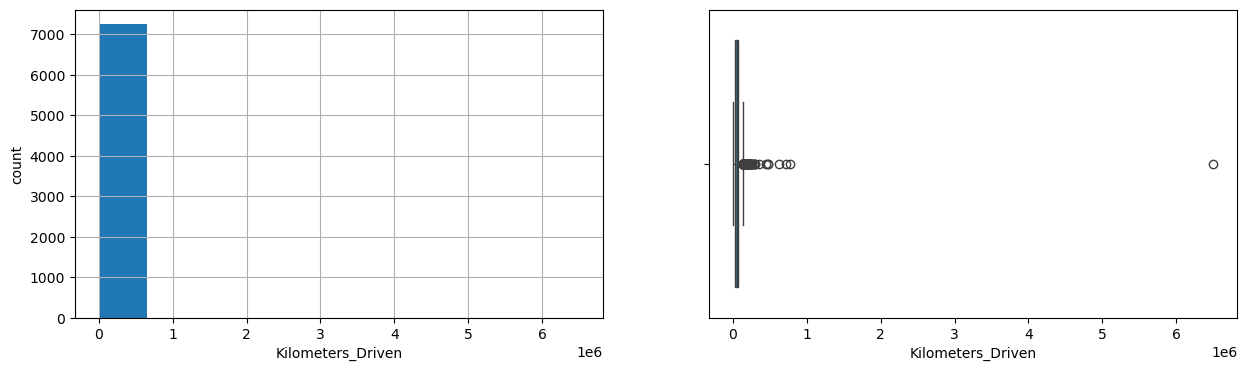

Seats
Skew : 1.9


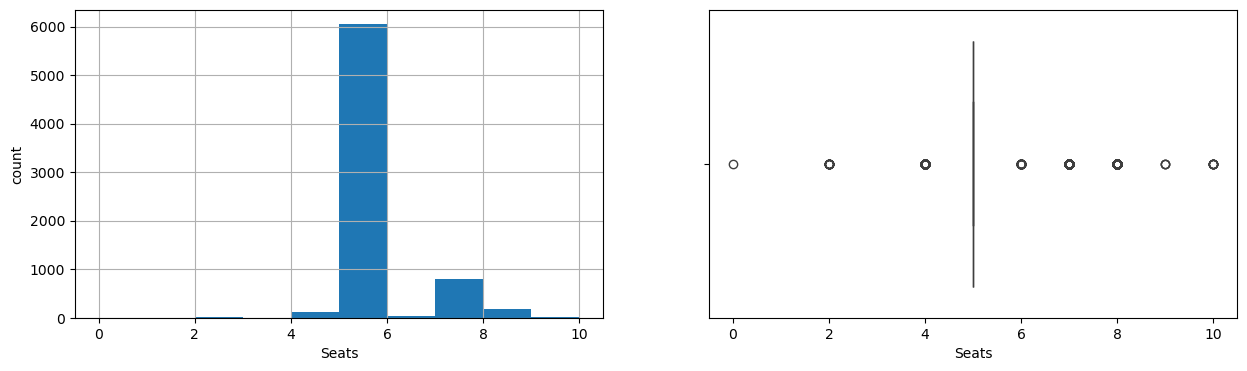

Price
Skew : 3.34


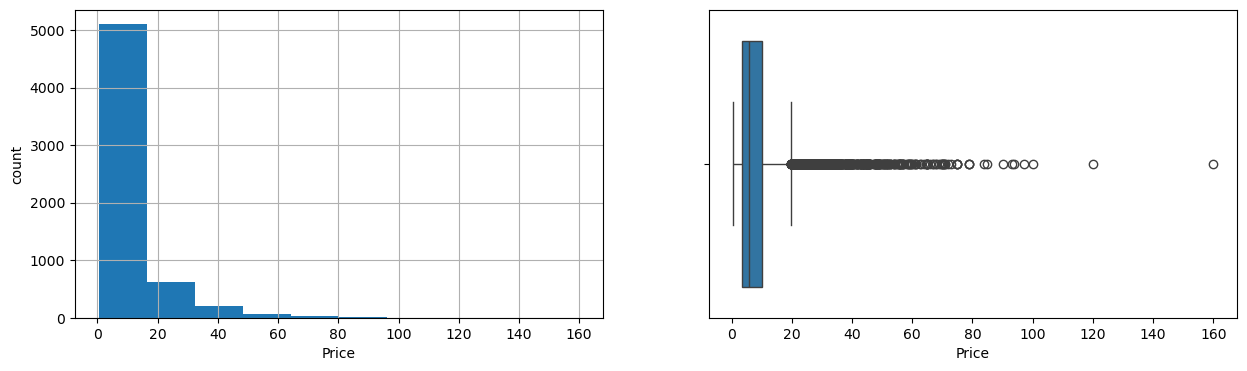

Car_Age
Skew : 0.84


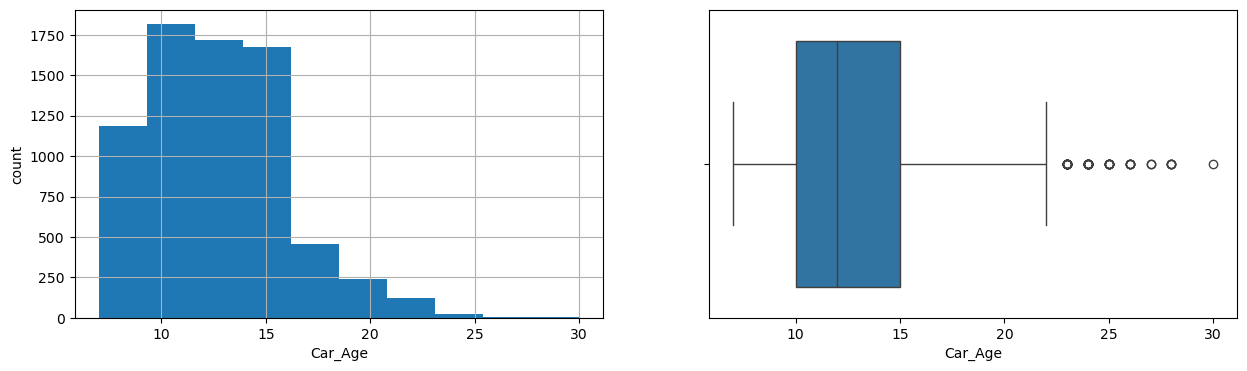

In [35]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=True)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

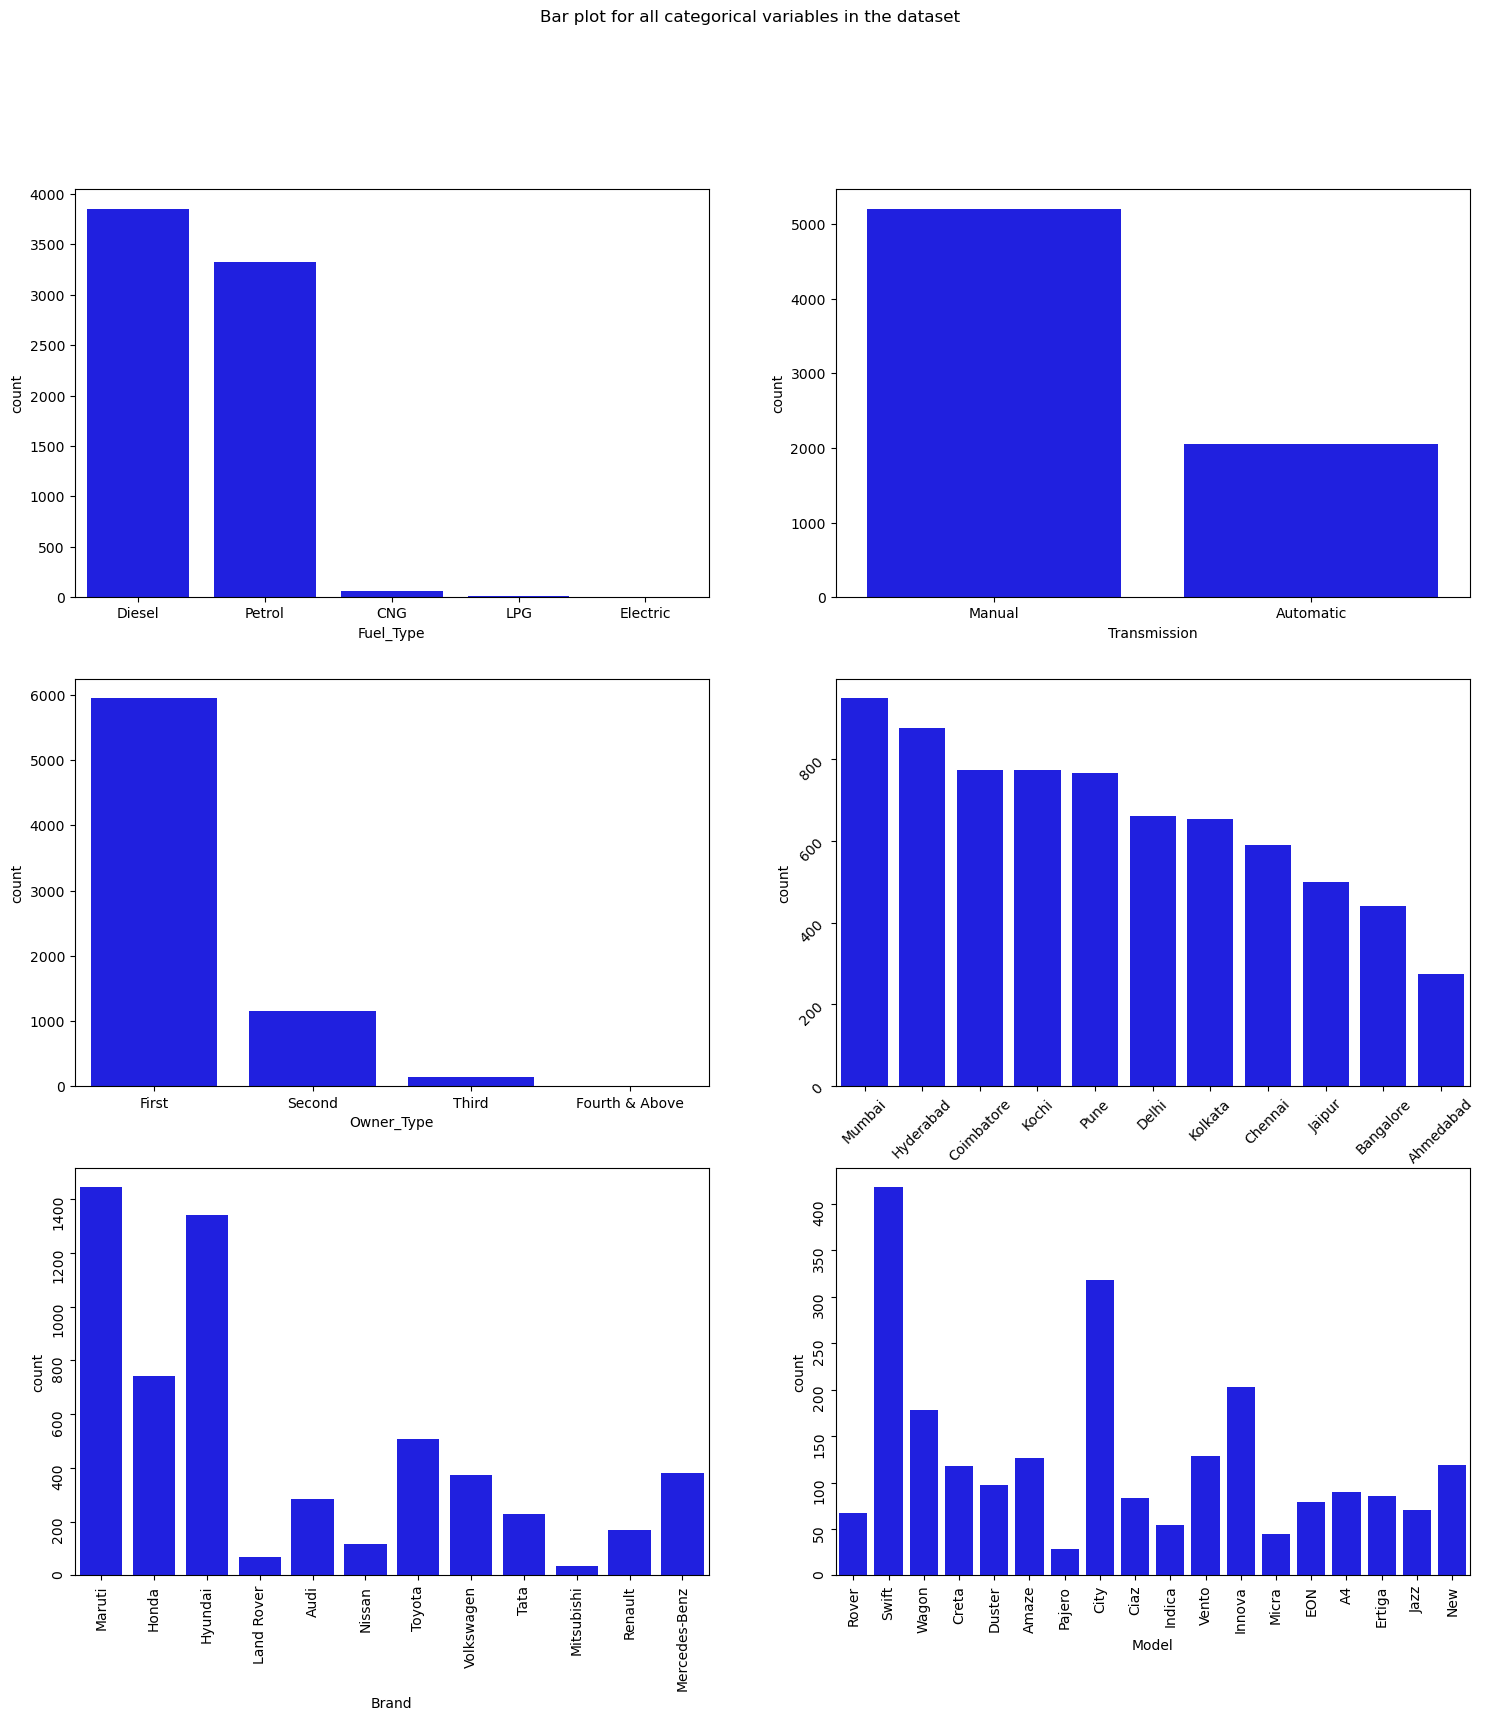

In [36]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [ ]:
# Log Transformation / Normalization

In [38]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [39]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

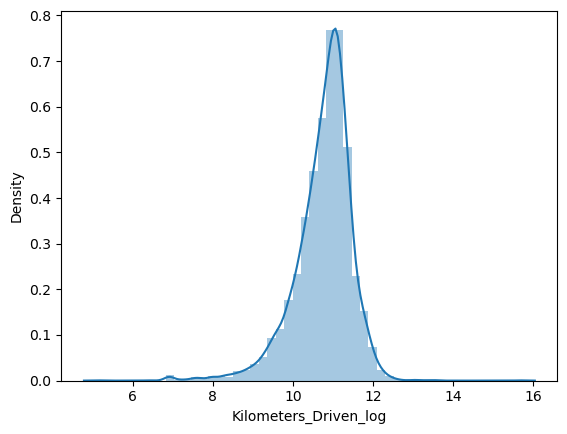

In [43]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

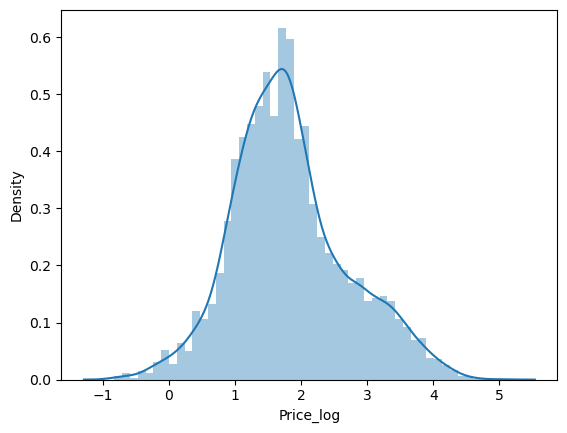

In [44]:
sns.distplot(data["Price_log"], axlabel="Price_log");

In [ ]:
# Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

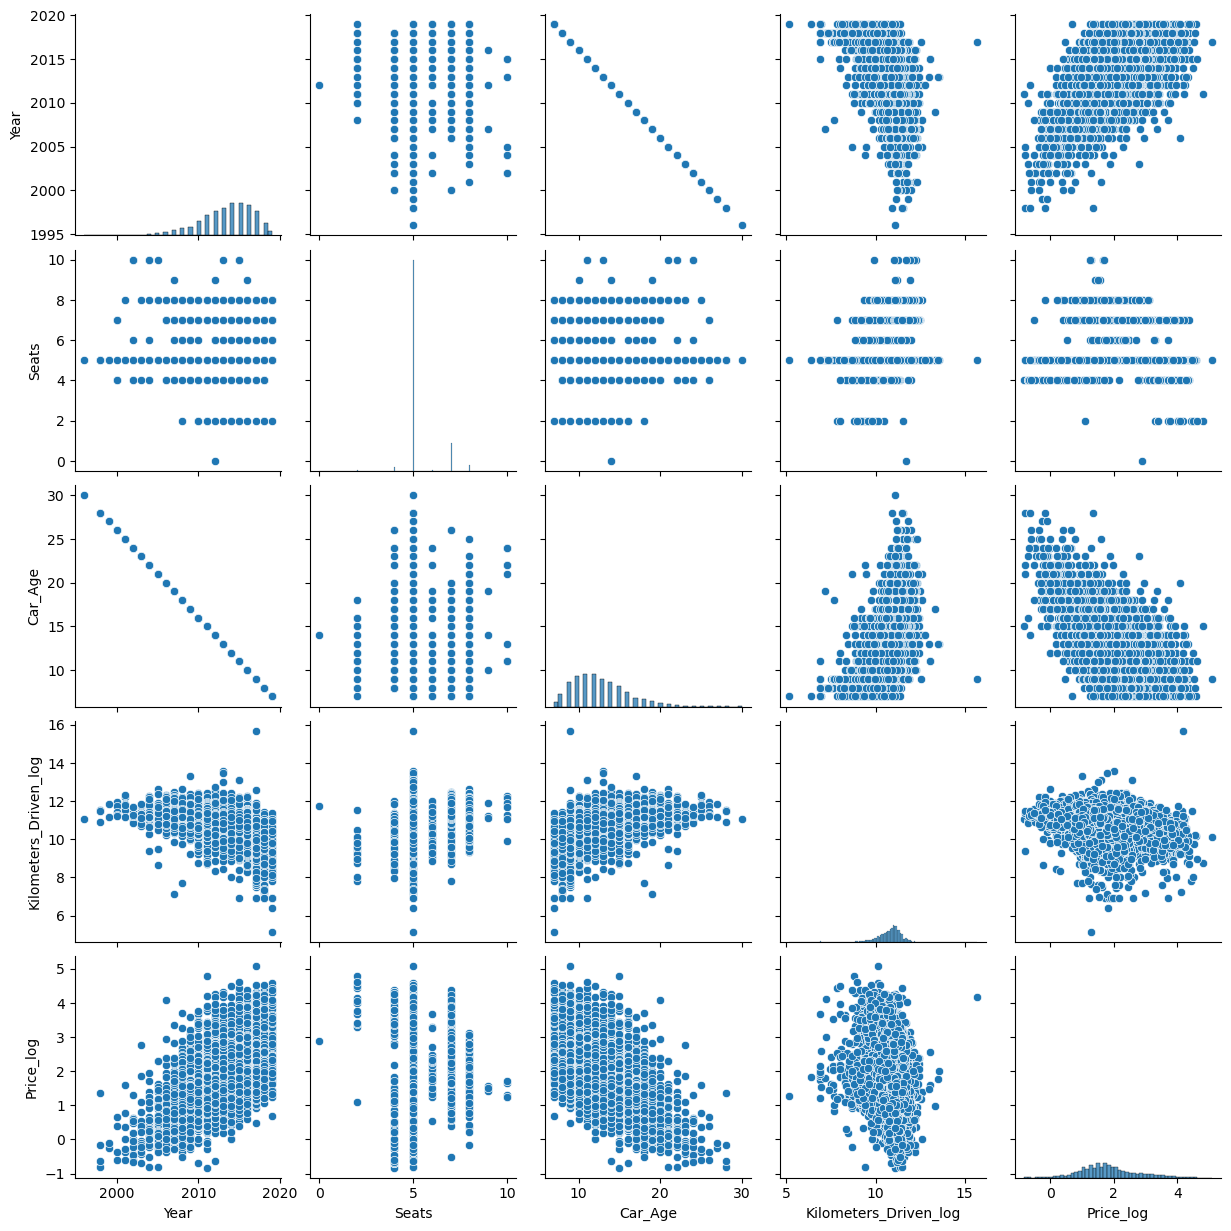

In [45]:
#Pair plot - shows the relation between 2 variables
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

In [ ]:
# Bivariate Analysis - Bar Plot
# show the relationship between Categorical variables and continuous variables 

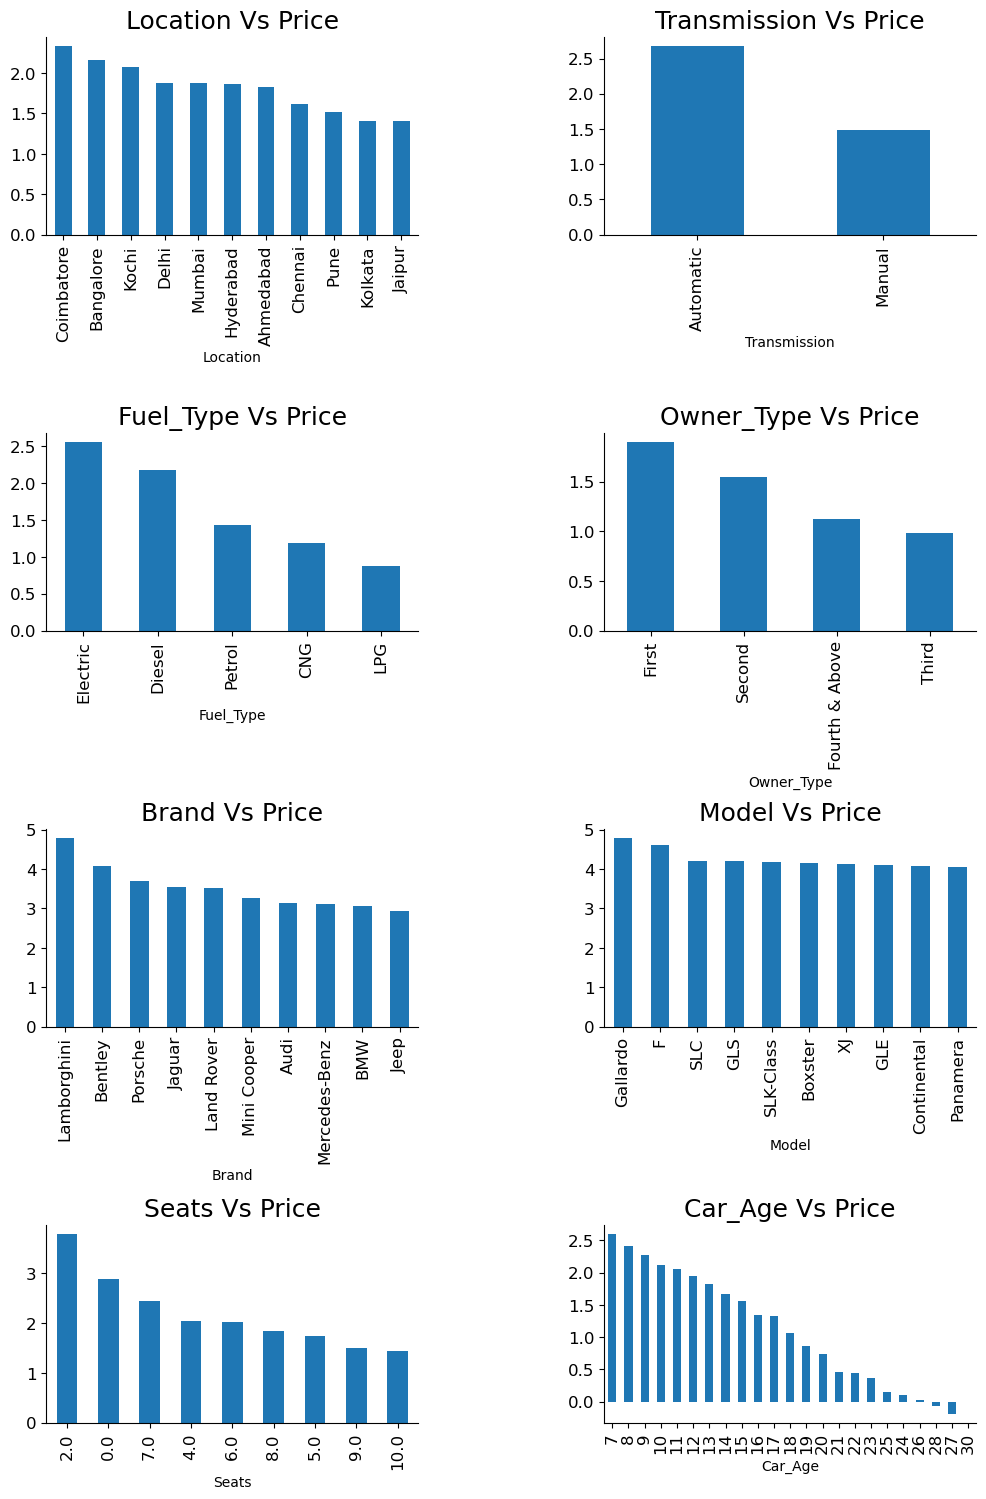

In [46]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [48]:
# Multivariate Analysis
# Heat map is the usual choice for Multivariate Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

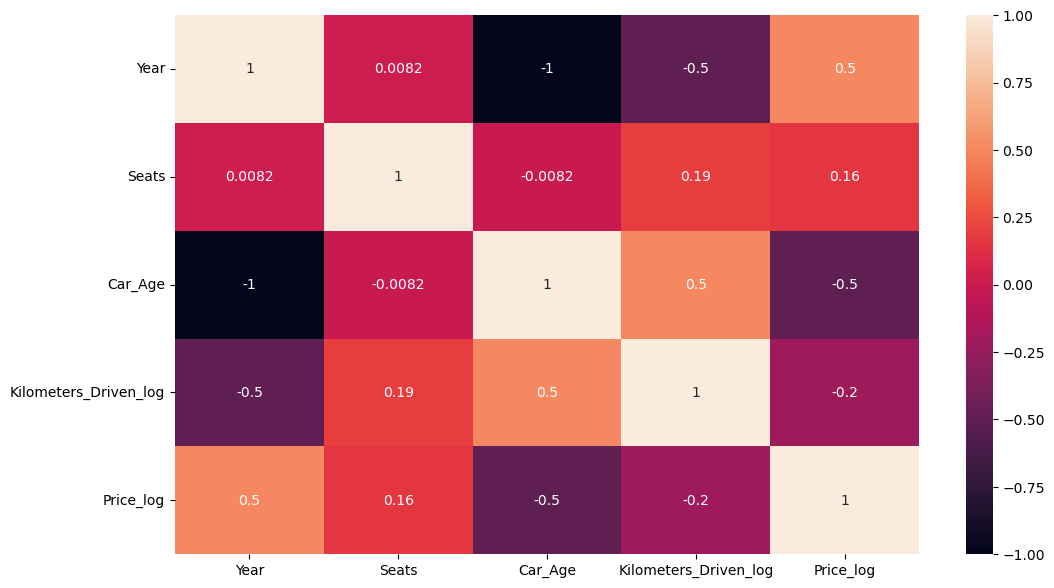

In [53]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Name','Location','Fuel_Type','Transmission','Owner_Type','Brand','Model','Mileage','Engine','Power','New_Price','Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [ ]:
# Adding to missing values

In [54]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

np.int64(2)